### display  EEG data channel location

 - 뇌파 데이터는 머리의 두피 부분에 전극을 연결하여 전위를 측정한 것이다
 
 - 이러한 하나의 전극은 이전에 언급된 channel(채널)이라는 이름으로 사용된다
 
 - 뇌파는 머리의 뇌에서 발생하는 것이므로 여러 영역, 위치에 걸쳐 획득되어 사용되어야 한다
 
 - 각 전극은 머리의 어느 위치에 있느냐에 따라 서로 다른 위치를 가진다고 볼 수 있다
 
 - 이러한 전극을 위치에 따라 배치하는 방법은 뇌파를 측정하는 목적에 따라 여러가지가 있다
 
 - 이러한 배치 방법을 montage라고 부른다
 
 - 뇌전증(epilepsy)를 측정하는데에 용이한 배치 방법으로는 double banana montage가 있다
 
 - 아래의 그림은 뇌파를 측정하는 모습을 보여준다
 
 - 여기서 머리의 두피 부분에 하얀색 동그라미 부분이 뇌파를 측정할 수 있는 전극(즉, channel)이 있는 부분이다
 
 - 위의 설명과 같이 두피의 여러 부분에서 뇌파를 측정할 수 있게 되어 있다 
 
 > **NOTE** 여기서 뇌파의 배치 방법이 montage(몽타주)라고 명명하였지만 montage는 (좀 더 깊게보자면) 기준 전극을 어디로 두고 각 채널의 값을 계산하는가 또한 합쳐진 개념이다.

In [1]:
from IPython.display import Image

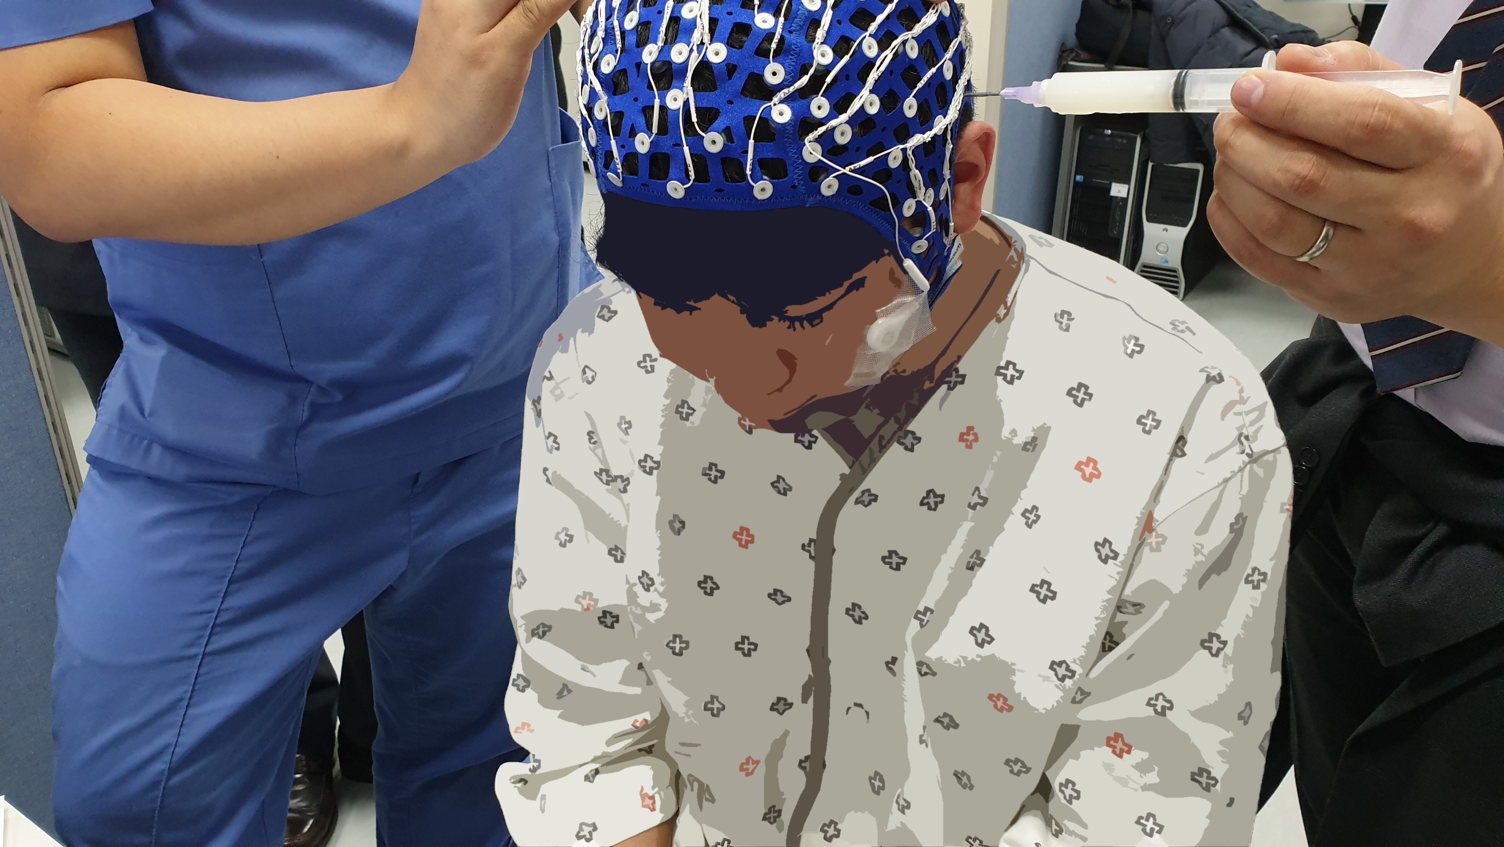

In [2]:
Image("img/00_img.png")

In [3]:
# eeg 데이터의 경로를 정의
eeg_data_path = 'data/00002806_s001_t000.edf'

In [4]:
# 사용할 모듈의 함수를 정의
import os
import mne
from mne.io import read_raw_edf

In [5]:
# 데이터를 읽기
raw = read_raw_edf(eeg_data_path, preload=True)

Extracting EDF parameters from data/00002806_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10399  =      0.000 ...    25.997 secs...


In [6]:
# 심전도 channel 이름을 좀 더 명확하게 바꾸기
raw.rename_channels(mapping={'EEG EKG-REF': 'EKG'})

# EKG channel에 대하여 설정 변경
raw.set_channel_types(mapping={'EKG': 'ecg'})

# events channel에 대하여 설정 변경
raw.set_channel_types(mapping={'STI 014': 'stim'})

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


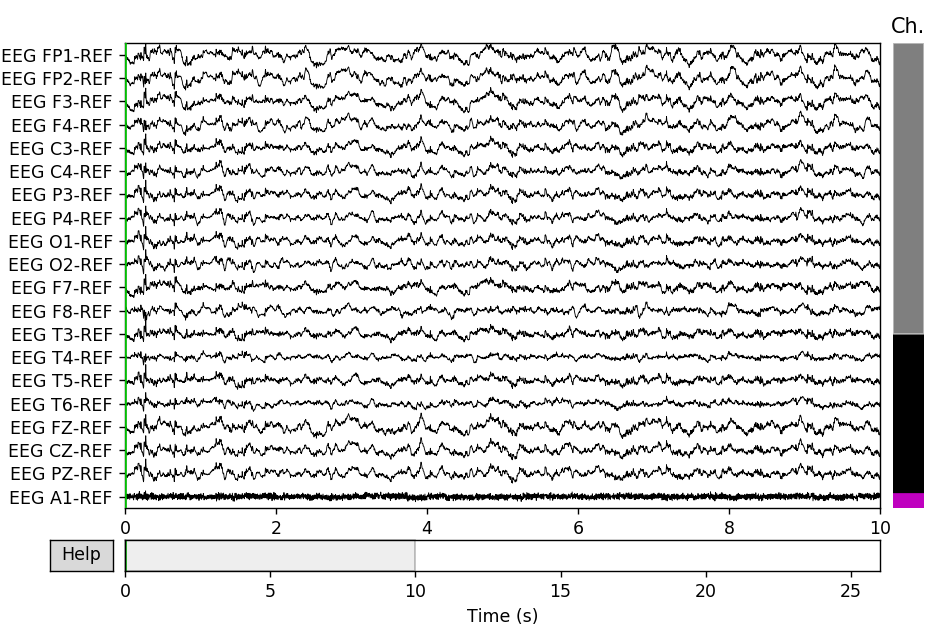

<IPython.core.display.Javascript object>


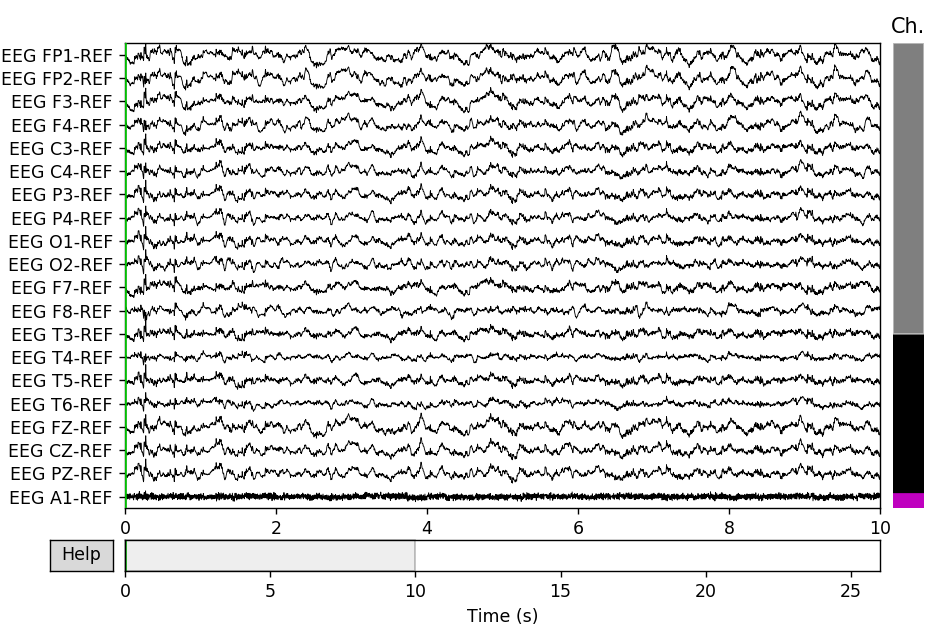

In [8]:
# EEG를 display
raw.plot(scalings = dict(eeg = 80e-6))

In [9]:
raw.ch_names

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EKG',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'EEG SP1-REF',
 'EEG SP2-REF',
 'EEG LUC-REF',
 'EEG RLC-REF',
 'EEG RESP1-REF',
 'EEG RESP2-REF',
 'EEG 31-REF',
 'STI 014']

 - 여기서 필요없다고 생각되는 channel을 선택하여 삭제한다  
 
 - 여기서는 호흡 및 뇌파 전극과 크게 관련 없는 channel을 삭제한다  
 
 - 삭제할 channel의 이름들은 아래와 같다  
 
 > SP1, SP2, LUC, RLC, RESP1, RESP2, 31

In [10]:
# channel drop!
raw.drop_channels(['EEG SP1-REF', 'EEG SP2-REF', 'EEG LUC-REF', 'EEG RLC-REF', 'EEG RESP1-REF', 'EEG RESP2-REF', 'EEG 31-REF'])

<RawEDF  |  00002806_s001_t000.edf, n_channels x n_times : 25 x 10400 (26.0 sec), ~2.0 MB, data loaded>

 - 이후 각 채널들이 가진 각각의 위치 값을 확인해보자
 
 - 이는 `info`의 `chs` 항목을 확인해보면 된다
 
 - `chs` 항목 중 `loc`가 모두 0으로 되어 있는 것을 볼 수 있는데 이는 채널의 위치 값이 존재하지 않음을 의미한다

In [11]:
raw.info['chs']

[{'cal': 65534.0,
  'logno': 1,
  'scanno': 1,
  'range': 58966.22,
  'unit_mul': 0.0,
  'ch_name': 'EEG FP1-REF',
  'unit': 107,
  'coord_frame': 4,
  'coil_type': 1,
  'kind': 2,
  'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
 {'cal': 65534.0,
  'logno': 2,
  'scanno': 2,
  'range': 58966.22,
  'unit_mul': 0.0,
  'ch_name': 'EEG FP2-REF',
  'unit': 107,
  'coord_frame': 4,
  'coil_type': 1,
  'kind': 2,
  'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
 {'cal': 65534.0,
  'logno': 3,
  'scanno': 3,
  'range': 58966.22,
  'unit_mul': 0.0,
  'ch_name': 'EEG F3-REF',
  'unit': 107,
  'coord_frame': 4,
  'coil_type': 1,
  'kind': 2,
  'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
 {'cal': 65534.0,
  'logno': 4,
  'scanno': 4,
  'range': 58966.22,
  'unit_mul': 0.0,
  'ch_name': 'EEG F4-REF',
  'unit': 107,
  'coord_frame': 4,
  'coil_type': 1,
  'kind': 2,
  'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
 {'cal': 6

 - 정확하게는 뇌파를 측정할 때 위치 값을 저장하면 좋으나 장비마다 지원하지 않는 경우도 있다
 
 - 하지만 일반적으로 채널의 이름은 두개 위에서 비슷한 위치내에 부착될 것이다
 
 - 예를 들어 FP의 경우 두개의 앞 부분(frontal) 이다
 
 - `mne`에서는 이러한 위치 정보의 값을 montage에 따라 제공하고 있다

In [12]:
montage_dir = os.path.join(os.path.dirname(mne.__file__),
                           'channels', 'data', 'montages')
print('\nBUILT-IN MONTAGE FILES')
print('======================')
print(sorted(os.listdir(montage_dir)))


BUILT-IN MONTAGE FILES
['EGI_256.csd', 'GSN-HydroCel-128.sfp', 'GSN-HydroCel-129.sfp', 'GSN-HydroCel-256.sfp', 'GSN-HydroCel-257.sfp', 'GSN-HydroCel-32.sfp', 'GSN-HydroCel-64_1.0.sfp', 'GSN-HydroCel-65_1.0.sfp', 'biosemi128.txt', 'biosemi16.txt', 'biosemi160.txt', 'biosemi256.txt', 'biosemi32.txt', 'biosemi64.txt', 'easycap-M1.txt', 'easycap-M10.txt', 'mgh60.elc', 'mgh70.elc', 'standard_1005.elc', 'standard_1020.elc', 'standard_alphabetic.elc', 'standard_postfixed.elc', 'standard_prefixed.elc', 'standard_primed.elc']


In [13]:
mne.channels.get_builtin_montages() #'montage_dir\\standard_1020.elc'

['EGI_256',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'biosemi128',
 'biosemi16',
 'biosemi160',
 'biosemi256',
 'biosemi32',
 'biosemi64',
 'easycap-M1',
 'easycap-M10',
 'mgh60',
 'mgh70',
 'standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed']

 - `mne`에서 제공되는 여러 montage 중 우리가 사용하는 데이터의 대부분의 channel을 가지고 있는 montage를 찾으면 아래와 같다

In [14]:
montage = mne.channels.read_montage(montage_dir + '/standard_postfixed.elc')

In [15]:
montage.ch_names

['LPA',
 'RPA',
 'Nz',
 'Fp1',
 'Fpz',
 'Fp2',
 'F7a',
 'F5a',
 'F3a',
 'F1a',
 'Fza',
 'F2a',
 'F4a',
 'F6a',
 'F8a',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'F7p',
 'F5p',
 'F3p',
 'F1p',
 'Fzp',
 'F2p',
 'F4p',
 'F6p',
 'F8p',
 'T1',
 'T3a',
 'C5a',
 'C3a',
 'C1a',
 'Cza',
 'C2a',
 'C4a',
 'C6a',
 'T4a',
 'T2',
 'T3',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T4',
 'T3p',
 'C5p',
 'C3p',
 'C1p',
 'Czp',
 'C2p',
 'C4p',
 'C6p',
 'T4p',
 'T5a',
 'P5a',
 'P3a',
 'P1a',
 'Pza',
 'P2a',
 'P4a',
 'P6a',
 'T6a',
 'Cb1a',
 'T5',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'T6',
 'Cb2a',
 'Cb1',
 'O1a',
 'P5p',
 'P3p',
 'P1p',
 'Pzp',
 'P2p',
 'P4p',
 'P6p',
 'O2a',
 'Cb2',
 'O1',
 'Oz',
 'O2',
 'Cb1p',
 'Iz',
 'Cb2p',
 'M1',
 'M2',
 'A1',
 'A2']

18 duplicate electrode labels found:
F7p/T3a, F5p/C5a, F3p/C3a, F1p/C1a, Fzp/Cza, F2p/C2a, F4p/C4a, F6p/C6a, F8p/T4a, T3p/T5a, C5p/P5a, C3p/P3a, C1p/P1a, Czp/Pza, C2p/P2a, C4p/P4a, C6p/P6a, T4p/T6a
Plotting 85 unique labels.


<IPython.core.display.Javascript object>


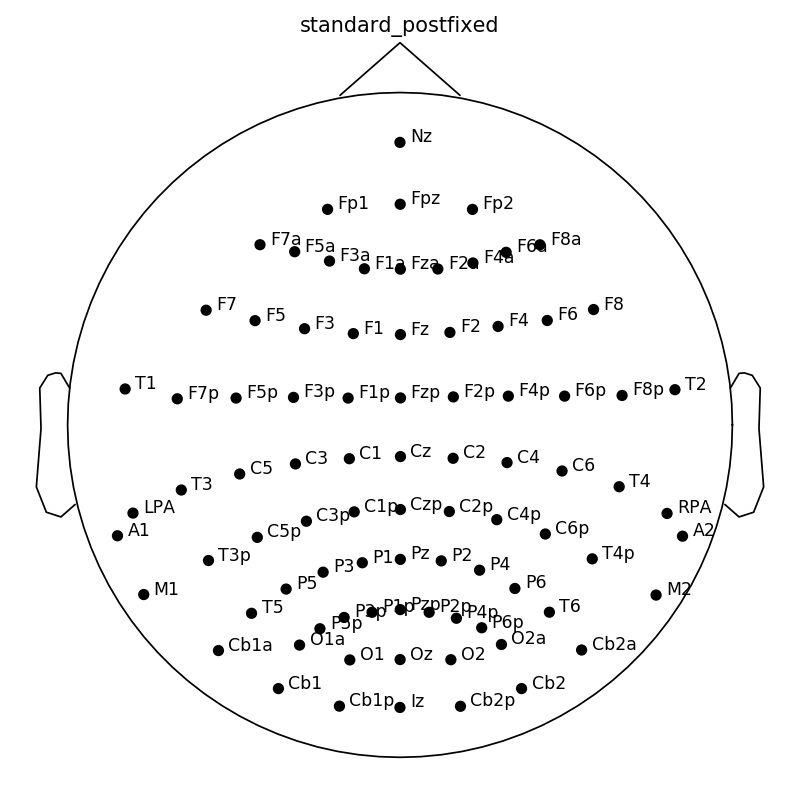

<IPython.core.display.Javascript object>


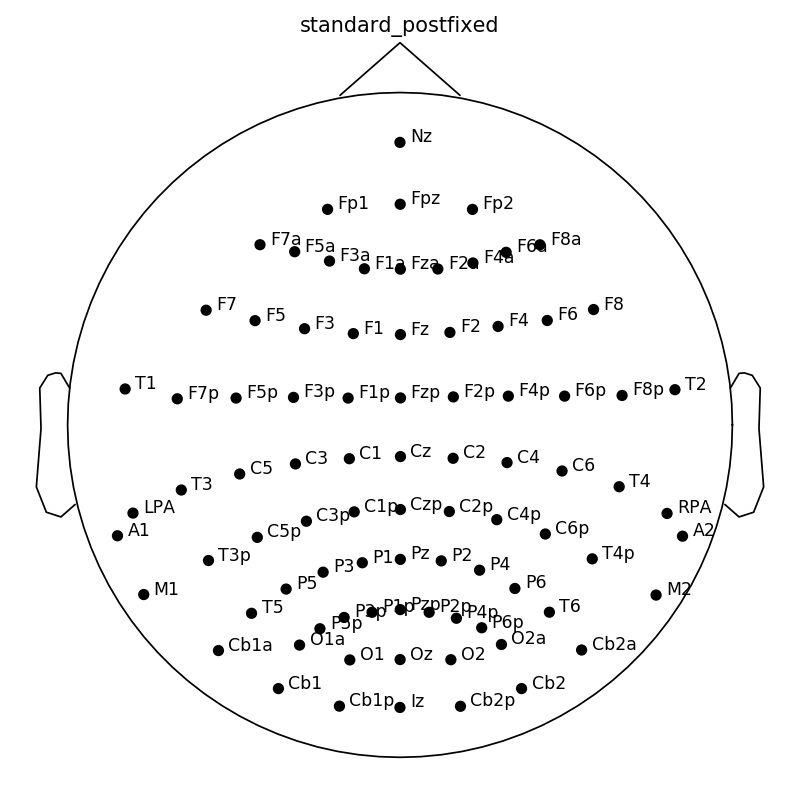

In [16]:
montage.plot()

In [17]:
montage.pos

array([[-8.607610e-02, -1.998970e-02, -4.798600e-02],
       [ 8.579390e-02, -2.000930e-02, -4.803100e-02],
       [ 8.300000e-06,  8.681100e-02, -3.998300e-02],
       [-2.943670e-02,  8.391710e-02, -6.990000e-03],
       [ 1.123000e-04,  8.824700e-02, -1.713000e-03],
       [ 2.987230e-02,  8.489590e-02, -7.080000e-03],
       [-5.483970e-02,  6.857220e-02, -1.059000e-02],
       [-4.543070e-02,  7.286220e-02,  5.978000e-03],
       [-3.370070e-02,  7.683710e-02,  2.122700e-02],
       [-1.847170e-02,  7.990410e-02,  3.275200e-02],
       [ 2.313000e-04,  8.077100e-02,  3.541700e-02],
       [ 1.982030e-02,  8.030190e-02,  3.276400e-02],
       [ 3.571230e-02,  7.772590e-02,  2.195600e-02],
       [ 4.658430e-02,  7.380780e-02,  6.034000e-03],
       [ 5.574330e-02,  6.965680e-02, -1.075500e-02],
       [-7.026290e-02,  4.247430e-02, -1.142000e-02],
       [-6.446580e-02,  4.803530e-02,  1.692100e-02],
       [-5.024380e-02,  5.311120e-02,  4.219200e-02],
       [-2.749580e-02,  5.69

 - `mne`에서 제공하는 montage의 위치 값을 우리가 다루는 뇌파 데이터 셋에 추가하여 보자

In [18]:
ch_count = 0

for ch in raw.ch_names:
    try:
        ch_name_with_EEG_txt = ch.split('-')[0]
        ch_name = ch_name_with_EEG_txt.split(' ')[1]
        mnt_count = 0
        for ch_mnt in montage.ch_names:
            if ch_name in ch_mnt.upper():
                raw.info['chs'][ch_count]['loc'] = montage.pos[mnt_count]
            mnt_count = mnt_count + 1 

        ch_count = ch_count + 1
    except:
        ch_count = ch_count + 1

In [19]:
raw.info['chs']

[{'cal': 65534.0,
  'logno': 1,
  'scanno': 1,
  'range': 58966.22,
  'unit_mul': 0.0,
  'ch_name': 'EEG FP1-REF',
  'unit': 107,
  'coord_frame': 4,
  'coil_type': 1,
  'kind': 2,
  'loc': array([-0.0294367,  0.0839171, -0.00699  ])},
 {'cal': 65534.0,
  'logno': 2,
  'scanno': 2,
  'range': 58966.22,
  'unit_mul': 0.0,
  'ch_name': 'EEG FP2-REF',
  'unit': 107,
  'coord_frame': 4,
  'coil_type': 1,
  'kind': 2,
  'loc': array([ 0.0298723,  0.0848959, -0.00708  ])},
 {'cal': 65534.0,
  'logno': 3,
  'scanno': 3,
  'range': 58966.22,
  'unit_mul': 0.0,
  'ch_name': 'EEG F3-REF',
  'unit': 107,
  'coord_frame': 4,
  'coil_type': 1,
  'kind': 2,
  'loc': array([-0.0601819,  0.0227162,  0.055544 ])},
 {'cal': 65534.0,
  'logno': 4,
  'scanno': 4,
  'range': 58966.22,
  'unit_mul': 0.0,
  'ch_name': 'EEG F4-REF',
  'unit': 107,
  'coord_frame': 4,
  'coil_type': 1,
  'kind': 2,
  'loc': array([0.0622931, 0.0237228, 0.05563  ])},
 {'cal': 65534.0,
  'logno': 5,
  'scanno': 5,
  'range': 589

 - 뇌파 환자 데이터에 위치 값을 추가하였다
 
 - 이제 이를 바탕으로 각 채널의 위치를 3D로 디스플레이해보자
 
 - `EKG` 및 `STI 014`를 제외한 23개의 channel의 위치가 디스플레이 되는 것을 확인할 수 있다

<IPython.core.display.Javascript object>


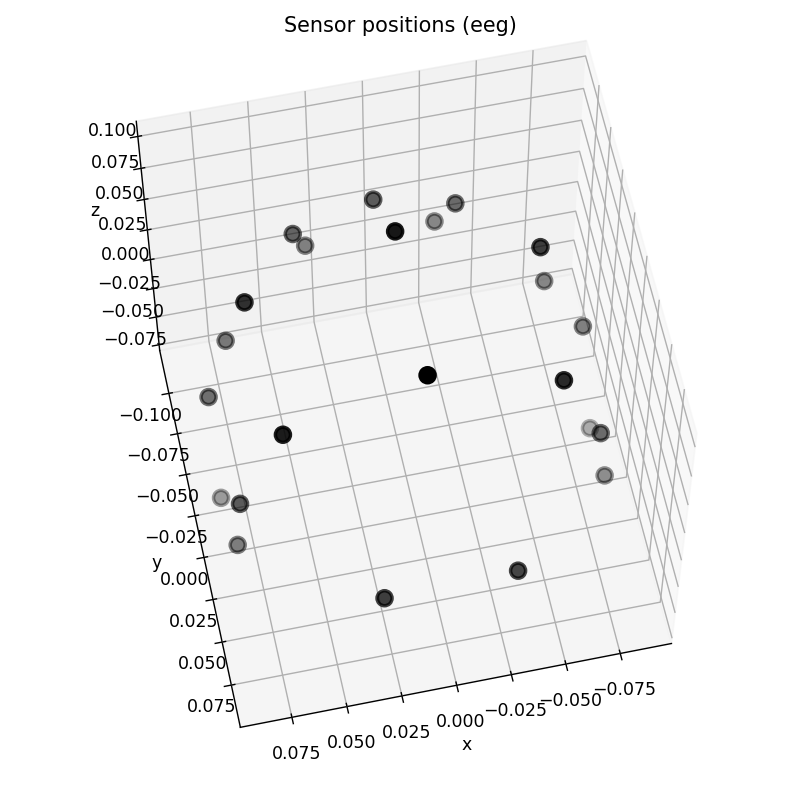

<IPython.core.display.Javascript object>


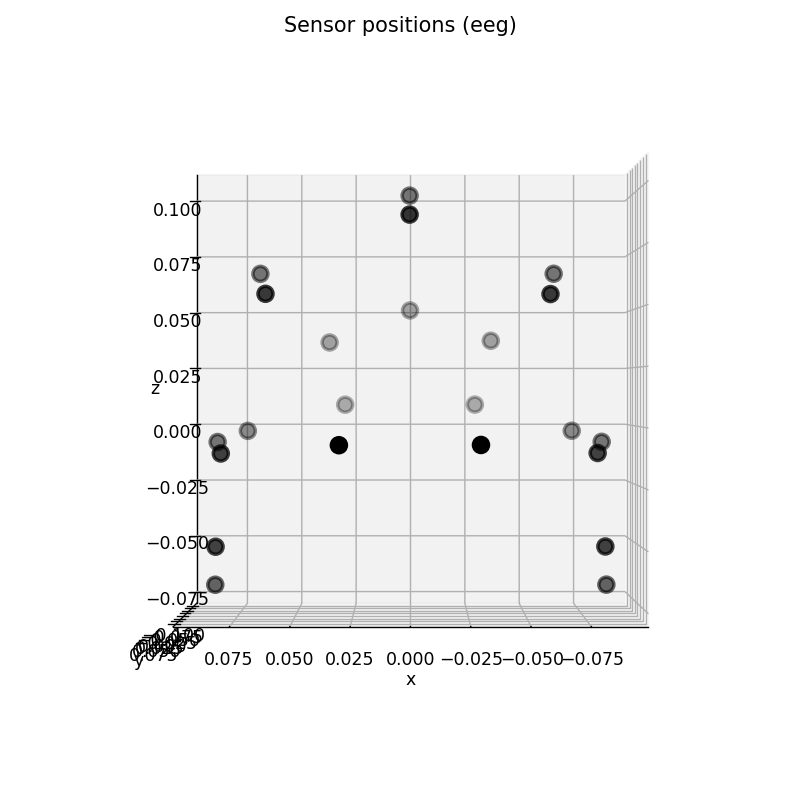

In [20]:
raw.plot_sensors('3d')

 - 이제 이 뇌파 데이터를 `.fif`형식으로 저장하자

In [23]:
# data 디렉토리안에 '_with_ecg_and_ch_loc'라는 surfix를 추가하여 fif 포맷으로 저장하기
raw.save('data/00002806_s001_t000_with_ecg_and_ch_loc.fif')

Writing C:\Users\dDk13\Desktop\EEG_processing\02\data\00002806_s001_t000_with_ecg_and_ch_loc.fif
Closing C:\Users\dDk13\Desktop\EEG_processing\02\data\00002806_s001_t000_with_ecg_and_ch_loc.fif [done]


<ipython-input-23-f653fbcfa012>:2: RuntimeWarning: This filename (data/00002806_s001_t000_with_ecg_and_ch_loc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw.save('data/00002806_s001_t000_with_ecg_and_ch_loc.fif')
